Data processing
---

Downloading the dataset from kaggle using kagglehub

In [1]:
import kagglehub
path = kagglehub.dataset_download("atharvasoundankar/impact-of-ai-on-digital-media-2020-2025")
print("Path to dataset files:", path)

c:\Users\hamro\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\hamro\.cache\kagglehub\datasets\atharvasoundankar\impact-of-ai-on-digital-media-2020-2025\versions\1


Uploading the libraries that I want to use

In [2]:
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

df = pd.read_csv(r'C:\Users\hamro\.cache\kagglehub\datasets\atharvasoundankar\impact-of-ai-on-digital-media-2020-2025\versions\1\Global_AI_Content_Impact_Dataset.csv')

Some initial data exploring of the basics

In [3]:
df.head()

,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41


In [4]:
print( df.shape)

(200, 12)


In [5]:
df.describe()

,Year,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Consumer Trust in AI (%),Market Share of AI Companies (%)
count,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2022.315000,54.265850,46.07260,25.788250,39.719450,54.102150,59.425150,26.569550
std,1.825496,24.218067,29.16122,13.901105,23.829545,19.247079,17.319668,14.023729
min,2020.000000,10.530000,1.04000,0.090000,0.140000,20.210000,30.120000,1.180000
25%,2021.000000,33.222500,20.32250,14.995000,17.907500,37.770000,44.755000,14.052500
50%,2022.000000,53.310000,44.32000,25.735000,42.100000,54.515000,59.215000,27.390000
75%,2024.000000,76.220000,71.62000,37.417500,58.697500,69.402500,74.885000,38.432500
max,2025.000000,94.760000,99.06000,49.710000,79.550000,88.290000,89.880000,49.280000


Checking for any mistakes that might have happened like empty values or duplicates

In [6]:
df.isnull().sum().sum()



np.int64(0)

In [7]:
df.duplicated().sum()

np.int64(0)

# Visualizations to help understand the data

Box plots for numerical columns by choosing only the numerical columns into the variable num_cols and then creating a loop to make a box plot for all of them

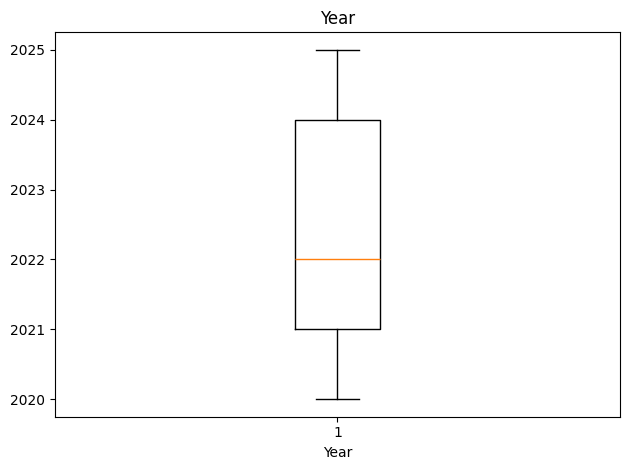

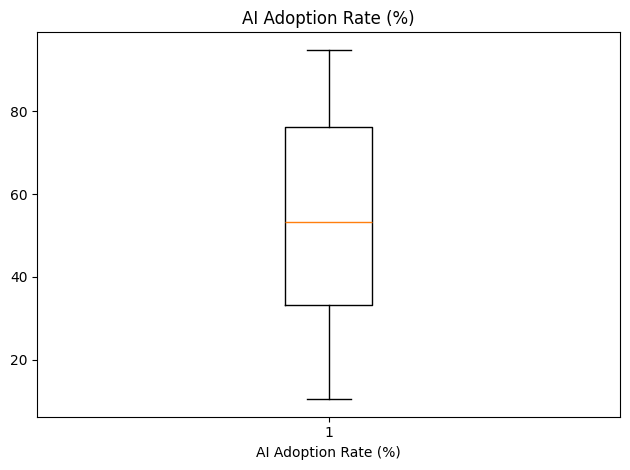

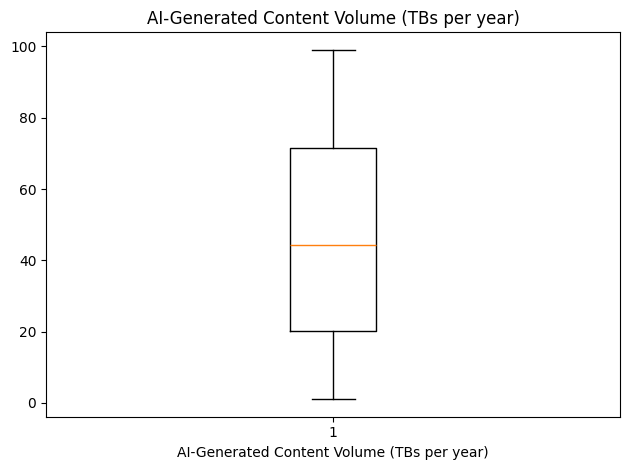

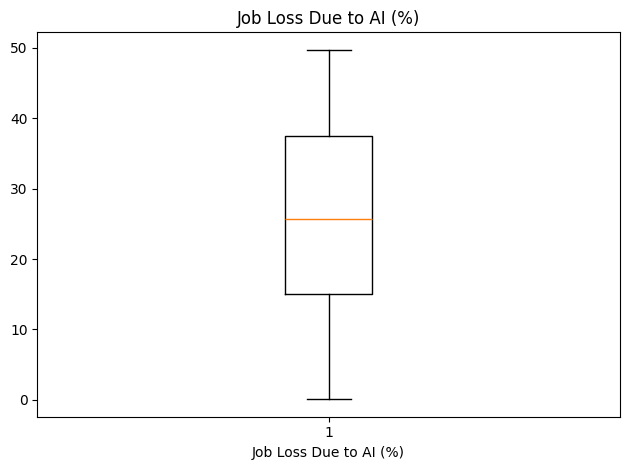

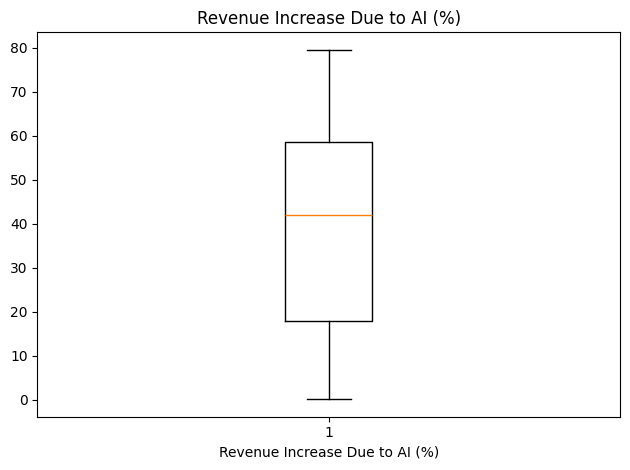

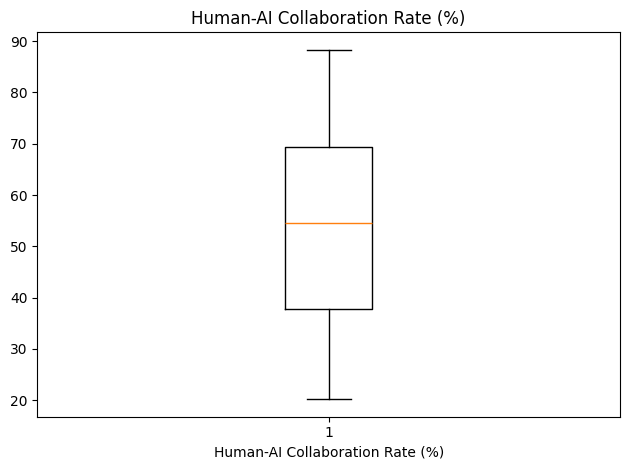

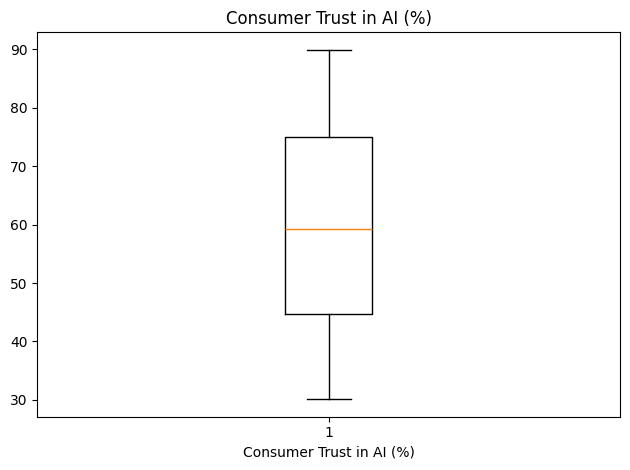

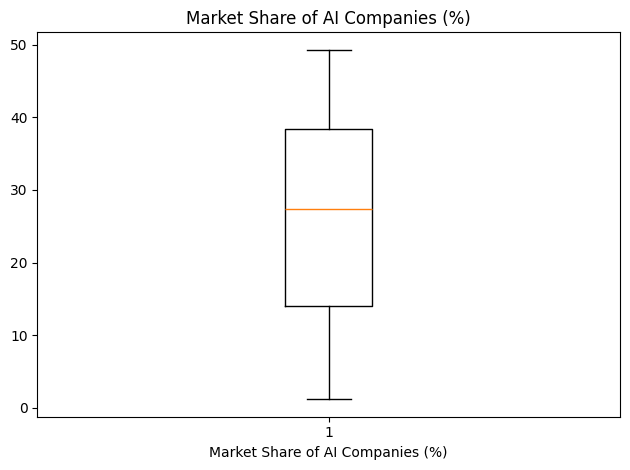

In [8]:
num_cols = df.select_dtypes(include="number").columns

for col in num_cols:
    plt.figure() 
    plt.boxplot(df[col])
    plt.title(col)
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


Pie charts for categorical columns, it has been done in a similair method by isolating all cetgrocial columsna and inserting them into a loop to make pie charts of them

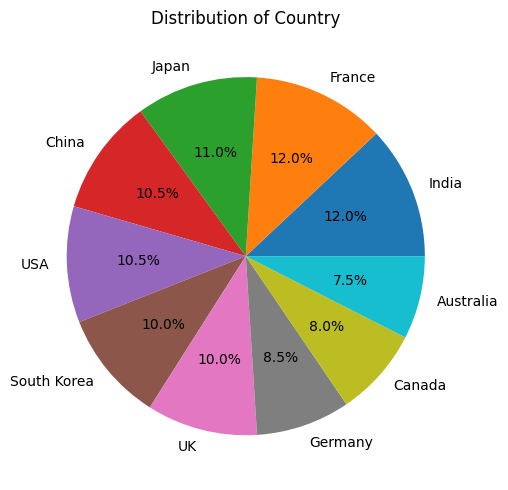

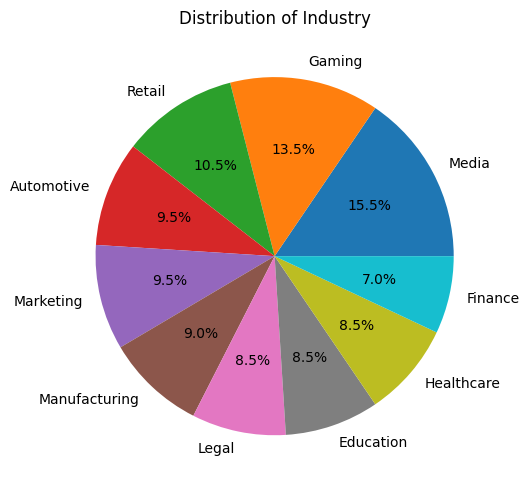

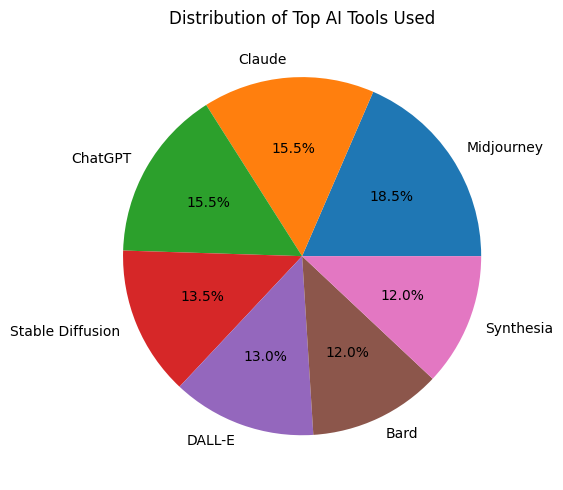

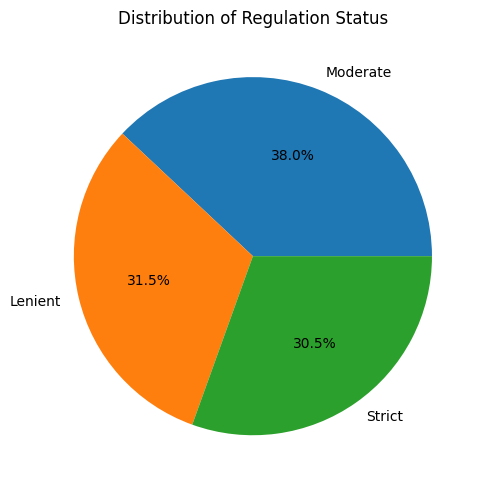

In [9]:
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    plt.pie(df[col].value_counts(), autopct='%1.1f%%', labels =df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Creating a correlation heatmap

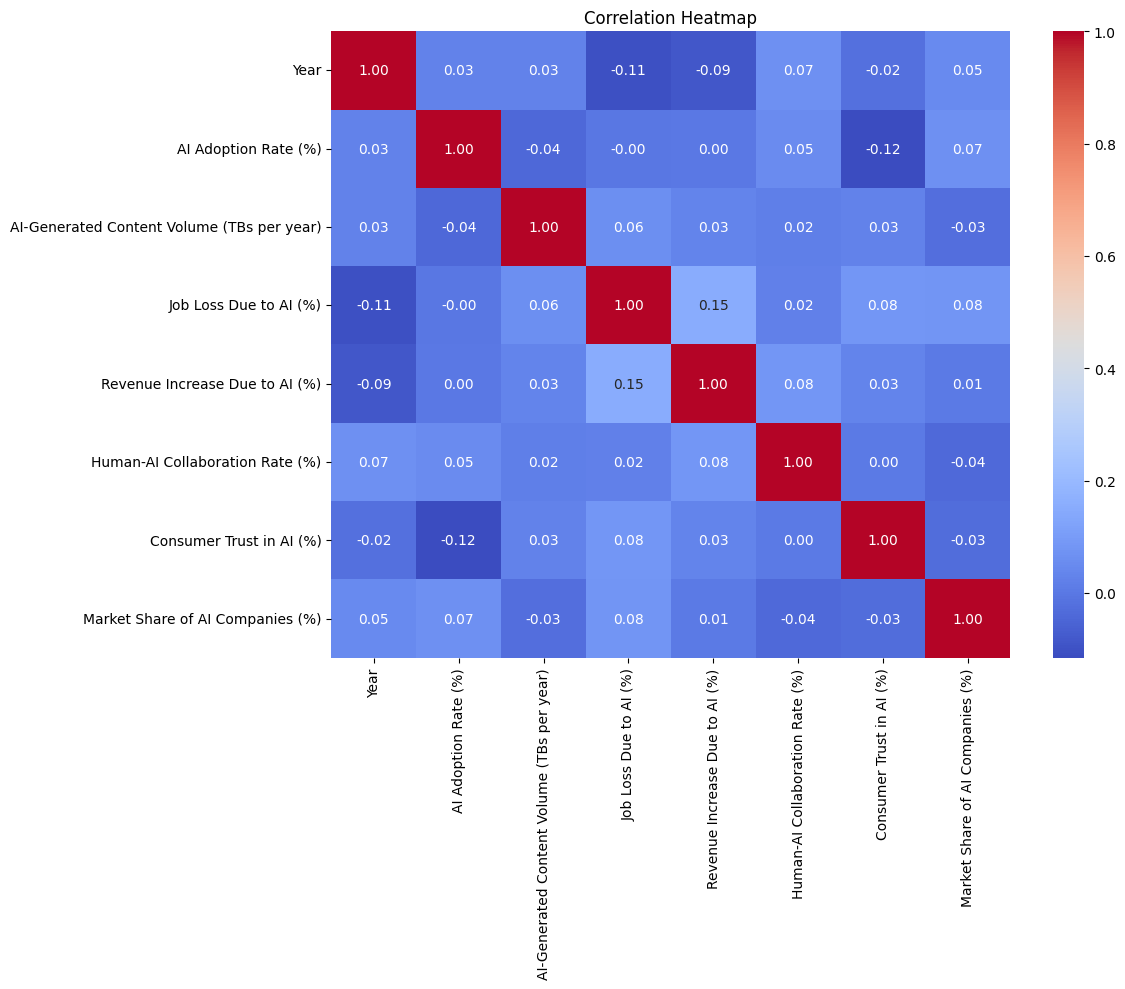

In [10]:
corr = df.select_dtypes('number').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

Checking averages of AI adoption rate, Revenue Increase and Human AI collab time using a line plot

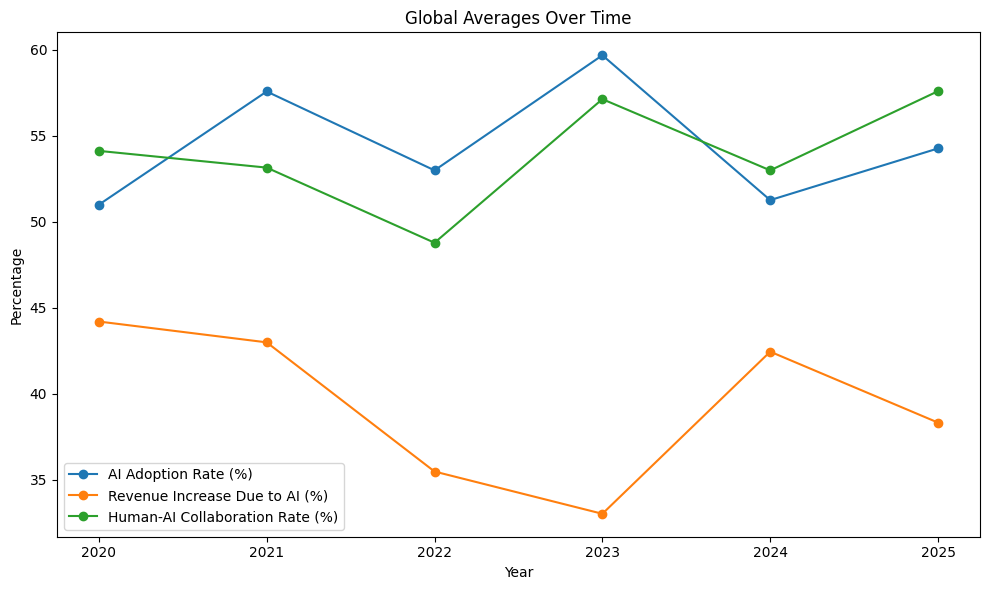

In [11]:
metrics = [
    "AI Adoption Rate (%)",
    "Revenue Increase Due to AI (%)",
    "Human-AI Collaboration Rate (%)",
]

yearly_mean = df.groupby("Year")[metrics].mean()

plt.figure(figsize=(10, 6))
for col in metrics:
    plt.plot(yearly_mean.index, yearly_mean[col], marker="o", label=col)

plt.title("Global Averages Over Time")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend()
plt.tight_layout()
plt.show()


By creating a line plot for the three metrics, we can reach multiple conclusions:
-   In 2023, even though revenue increase due to AI was the lowest, AI adoption rate and human-AI collaboration rate was the highest
-   In 2024, revenue increase due to AI reached its highest after people start using it more
-   In 2024, for the first time, Human AI collaboration reached a higher rate than AI adoption rate. Showcasing that due to the amount of people adopting AI, more and more are starting to collaborate 

AI adoption rate vs revenue increase in a scatterplot

C:\Users\hamro\AppData\Local\Temp\ipykernel_49784\2678517624.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(


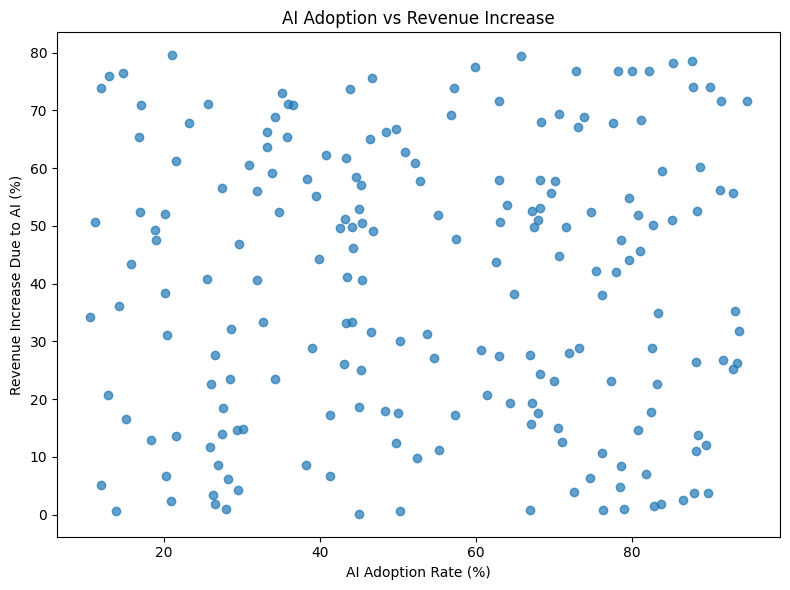

In [12]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df["AI Adoption Rate (%)"],
    df["Revenue Increase Due to AI (%)"],
    cmap="viridis",
    alpha=0.7,
)
plt.title("AI Adoption vs Revenue Increase")
plt.xlabel("AI Adoption Rate (%)")
plt.ylabel("Revenue Increase Due to AI (%)")
plt.tight_layout()
plt.show()

The scatterplot shown above is all over the place, shwoing no strong realtion between revenue increase and AI adroption rate

Sorting out the countries with the most revenue due to AI

C:\Users\hamro\AppData\Local\Temp\ipykernel_49784\785176910.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.values, y=top10.index, palette="mako")


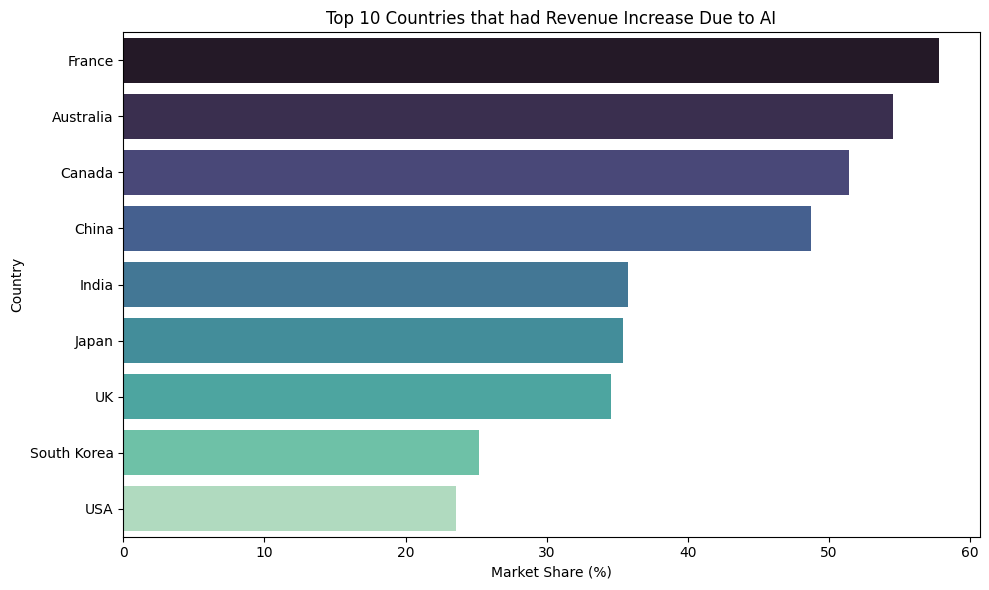

In [13]:
latest_year = df["Year"].max()
latest_df = df[df["Year"] == latest_year]

top10 = (
    latest_df.groupby("Country")["Revenue Increase Due to AI (%)"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=top10.values, y=top10.index, palette="mako")
plt.title(f"Top 10 Countries that had Revenue Increase Due to AI")
plt.xlabel("Market Share (%)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


France had the most revenue increase, while USA fell behind

Job losses that happens per year to AI

C:\Users\hamro\AppData\Local\Temp\ipykernel_49784\3455271682.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


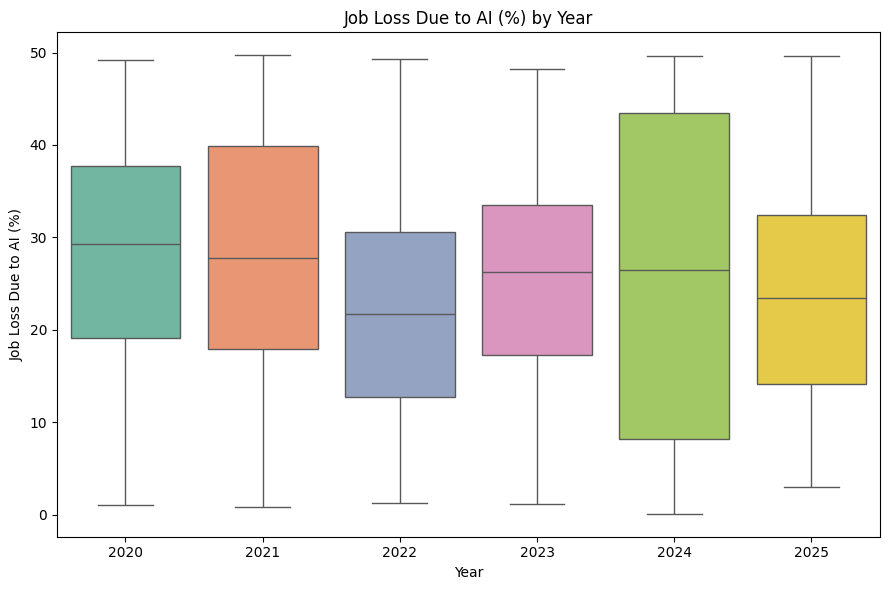

In [14]:
plt.figure(figsize=(9, 6))
sns.boxplot(
    x="Year",
    y="Job Loss Due to AI (%)",
    data=df,
    palette="Set2",
)
plt.title("Job Loss Due to AI (%) by Year")
plt.xlabel("Year")
plt.ylabel("Job Loss Due to AI (%)")
plt.tight_layout()
plt.show()

Checking for the average of the percentage of job losses due to AI every year, 2022 has the lowest average while 2024 showed the most losses happening. There are no outliers 

Starting to work on a regression line
---

Starting to pre-process the data 

Seperatting the target feature from the rest of the features

In [15]:
y = df['Revenue Increase Due to AI (%)']          
X = df.drop(columns=['Revenue Increase Due to AI (%)'])



Feature selection by doing two main stuff:
-   Seperating the numerical columns in the dataset to use


And feature selection using correlation co-efficent, by doing:
-   Creating a variable named corrs that has the values of the corrolation between y, the target value, and the numerical features
-   Creating a variable named keep_cols that just has a list of the features that has a correlation above 0.05
-   Changing X, which is the features that will be used to train the model, to only have the feature with a correlation above 0.05 

After that, I used train, test, split to split the data into training and testing sets

In [ ]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
corrs = X[num_cols].corrwith(y).abs()
keep_cols = corrs[corrs >= 0.05].index.tolist()

X = X[keep_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




Before creating the linear regression model, I also decided to use standard scaler to transform the numerical data to make sure that data that have higher numbers dont affect the model more.

In [17]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), keep_cols)
]) 

X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc  = preprocessor.transform(X_test)

reg = LinearRegression()
reg.fit(X_train_enc, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Evaluaton of the regression line

In [18]:
y_pred = reg.predict(X_test_enc)

r2   = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² : {r2:6.3f}")
print(f"MSE: {mae:6.3f}")
print(f"RMSE : {rmse:6.3f}")

R² :  0.031
MSE: 20.631
RMSE : 575.956


Plot showing actual vs predicted

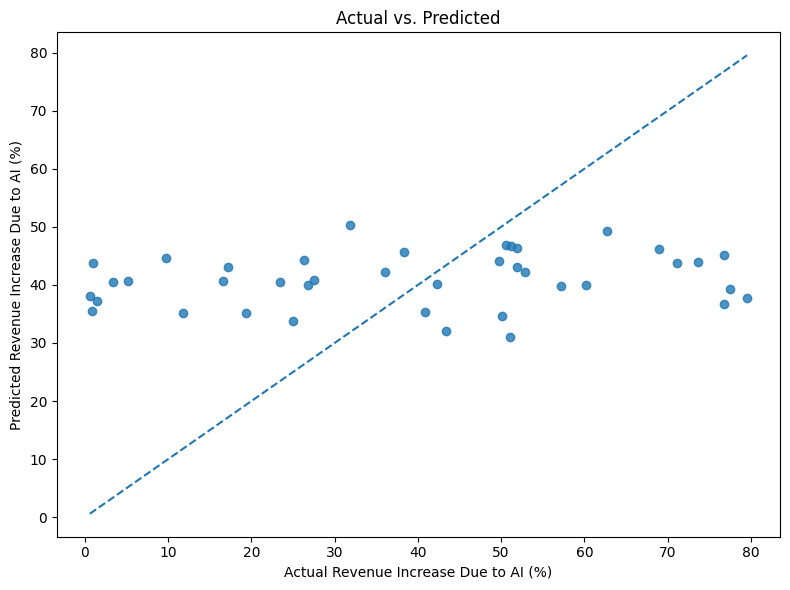

In [19]:


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.8)

lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, linestyle='--')

plt.xlabel("Actual Revenue Increase Due to AI (%)")
plt.ylabel("Predicted Revenue Increase Due to AI (%)")
plt.title(f"Actual vs. Predicted")
plt.tight_layout()
plt.show()


# Model deployment using Mlflow

In [20]:
import mlflow
import joblib
mlflow.set_experiment("AI_Digital_Media_Impact")

<Experiment: artifact_location='file:///c:/Users/hamro/Downloads/Personal/Studies/AI/mlruns/975222907320582368', creation_time=1749594921344, experiment_id='975222907320582368', last_update_time=1749594921344, lifecycle_stage='active', name='AI_Digital_Media_Impact', tags={}>

In [21]:
with mlflow.start_run():
    mlflow.log_param("model_type", "Linear Regression")
    mlflow.log_metric("r2_score", r2)
    mlflow.log_metric("rmse", rmse)
    mlflow.sklearn.log_model(reg, "model")
    mlflow.log_artifact("Global_AI_Content_Impact_Dataset.csv")   
    run_id = mlflow.active_run().info.run_id
print(f"Run ID: {run_id}")

2025/06/14 21:52:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/06/14 21:52:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: ca646647f5be4ab8a04ec22fc15d4769


Extracting the PKL file

In [22]:
joblib.dump(reg , "RegressionLineModel.pkl")
mlflow.log_artifact("RegressionLineModel.pkl")
mlflow.end_run()

Extracting the dataset for Azure usage 

In [23]:
X['Revenue Increase Due to AI (%)'] = y
X.to_csv("Global_AI_Content_Impact_Dataset2.csv", index=False)



